In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

## Simulation setup

#### Parameters

In [14]:
sim = rw.Simulation()

# source
nr_particles = 5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**15 # eV
phi = 0
pitch_angle = 2*np.pi * 54.74/360
source = rw.PointSourceOriented(energy, source_pos, nr_particles, pitch_angle, phi)
sim.add_source(source)

# propagator
nr_steps = 2*10**2
step_size = 0.5*10**10 # [m]
mfp = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12], dtype=np.float32)  # [m]
rms = 1 # [Gaus]
magnetic_field = rw.OrderedBackgroundField(rms, [0,0,1]).magnetic_field
propagator = rw.AnisotropicPropagator(magnetic_field, mfp, nr_steps, step_size)
sim.add_propagator(propagator)

# observer
substeps = [True, True, True] # observe only steps (no substeps)
observer = rw.ObserverAllSteps(substeps)

sim.add_observer(observer)

start simulation
Propagator initialized
Observer initialized


In [18]:
%time sim.run_simulation()
sim.save_data('data/data_tut_3')

CPU times: user 13.1 ms, sys: 0 ns, total: 13.1 ms
Wall time: 12.9 ms


## Analyze trajectories

Even though individual trajectories of particles performing a random walk have no physical meaning, their visualization is helpful in many respects:
- 1. The visualization of the substeps clarifies whether the implementation works as desired
- 2. The initial ballistic character of the propagation becomes visible
- 3. The diffusive character becomes visible on large time scales

First load simulated data file and create a trajectory object. As we simulated a 3d trajectory, we choose 3 dimensions and initialize the object with the dataframe. We also want to get a list of ids of our particles.

In [19]:
df = pd.read_pickle("data/data_tut_3.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
tra = rw.Trajectory(df_time_evolution_observer)
particle_ids = tra.get_particle_ids()

init trajectory plotting class


#### 1. Substeps
The visualization of the substeps clarifies whether the implementation works as desired. We choose only a few steps of a single particle to have a good resolution.

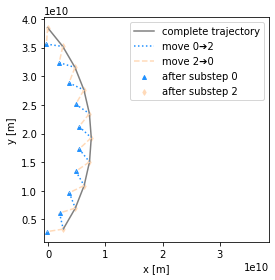

In [20]:
substep_0 = 0 # positions after 1. substep
substep_1 = 2 # positions after 3. substep -> final position after each step for 3d
nr_steps = 10
file_name = None # where to save figure (None doesn't save a figure)
tra.plot_trjectory_substeps(substep_0, substep_1, particle_ids[0], nr_steps, file_name)

#### 2. Ballistic movement
The initial ballistic character of the propagation becomes visible when plotting only a few steps.

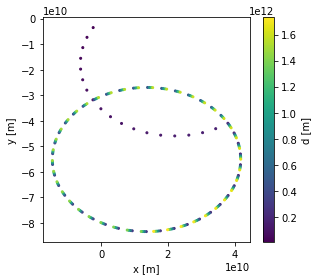

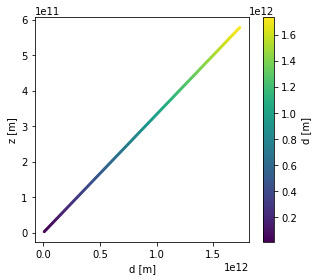

In [10]:
nr_steps = 2*10**2
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)
tra.plot_trajectory('d', 'z', 'd', particle_ids[0], nr_steps, None)

#### 3. Diffusive behaviour
The diffusive character becomes visible on large time scales.

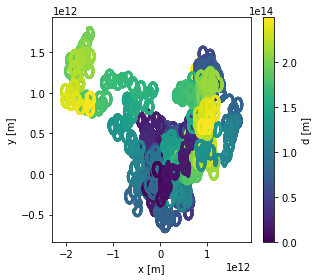

In [7]:
nr_steps = 5*10**4
tra.plot_trajectory('x', 'y', 'd', particle_ids[:4], nr_steps, None)